# Data Investigation - Status Data

### Import Data

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

import seaborn as sns
sns.set()

In [2]:
print('Loading Status Data...')

try:
    file_path_slug = '../../datasets/bayareabikeshare/*02_status_data.csv'

    # glob all files
    file_list = glob(file_path_slug)

    status_import = pd.DataFrame()

    counter = 1
    chunks = []

    # load data from each file
    for file in file_list:

        # import file in chunks
        for chunk in pd.read_csv(file, chunksize=10000, iterator=True):

            # append chunk to chunks list
            chunks.append(chunk)

        print('\tFinished file! (%d of %d)' % (counter, len(file_list)))
        counter += 1

    # concat chunks
    status_import = pd.concat(chunks)

    print('Data Loaded Successfully!')

except:
    print('oops... something went wrong importing the data :(')

Loading Status Data...
	Finished file! (1 of 1)
Data Loaded Successfully!


In [3]:
status_data = status_import.copy()
status_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16994602 entries, 0 to 16994601
Data columns (total 4 columns):
station_id         int64
bikes_available    int64
docks_available    int64
time               object
dtypes: int64(3), object(1)
memory usage: 648.3+ MB


### Clean And Resample Data

In [4]:
# append total_docks column
status_data['total_docks'] = status_data['bikes_available'] + status_data['docks_available']

# convert time to datetime
status_data['time']   = pd.to_datetime(status_data['time'],   format="%Y/%m/%d %H:%M:%S")

# set time column as index
status_data.set_index('time', inplace=True)

status_data.head()

,station_id,bikes_available,docks_available,total_docks
time,,,,
2013-08-29 12:06:01,2,2,25,27
2013-08-29 12:07:01,2,2,25,27
2013-08-29 12:08:01,2,2,25,27
2013-08-29 12:09:01,2,2,25,27
2013-08-29 12:10:01,2,2,25,27


In [5]:
status_data_resample = status_data.groupby('station_id').resample('0.5H').agg({'station_id': np.max, 'bikes_available': np.mean, 'docks_available': np.mean, 'total_docks': np.max})

# drop 'station_id' column after we moved it to the index
status_data_resample = status_data_resample[['bikes_available', 'docks_available', 'total_docks']]

# reset index
status_data_resample = status_data_resample.reset_index()#.set_index('station_id')

# for better comparison, create a bike availability ratio column
status_data_resample['bike_availability_ratio'] = status_data_resample['bikes_available'] / status_data_resample['total_docks'] * 100.

status_data_resample.head()

,station_id,time,bikes_available,docks_available,total_docks,bike_availability_ratio
0,2,2013-08-29 12:00:00,2.000000,25.000000,27.0,7.407407
1,2,2013-08-29 12:30:00,2.000000,25.000000,27.0,7.407407
2,2,2013-08-29 13:00:00,2.629630,24.370370,27.0,9.739369
3,2,2013-08-29 13:30:00,2.769231,24.230769,27.0,10.256410
4,2,2013-08-29 14:00:00,2.000000,25.000000,27.0,7.407407


In [6]:
status_data_resample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574525 entries, 0 to 574524
Data columns (total 6 columns):
station_id                 574525 non-null int64
time                       574525 non-null datetime64[ns]
bikes_available            574397 non-null float64
docks_available            574397 non-null float64
total_docks                574397 non-null float64
bike_availability_ratio    574397 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 26.3 MB


In [7]:
# station ID numbers that are in San Francisco
sf_stations = [ 39,41,42,45,46,47,48,49,50,51,54,55,56,57,58,59,60,61,62,63,
                64,65,66,67,68,69,70,71,72,73,74,75,76,77,82,90,91]

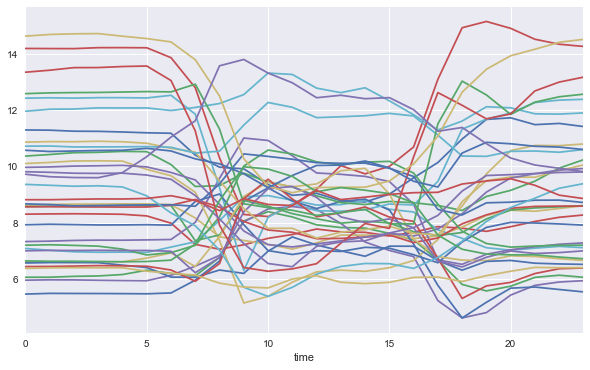

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

for i in sf_stations:
    try:
        status_data_resample[status_data_resample['station_id'] == i].bikes_available.groupby(status_data_resample.time.dt.hour).mean().plot(ax=ax)
    except:
        pass

plt.show()


In [9]:
status_data_copy = status_data.copy()
status_data_copy.reset_index(inplace=True)
status_data_copy.head()

,time,station_id,bikes_available,docks_available,total_docks
0,2013-08-29 12:06:01,2,2,25,27
1,2013-08-29 12:07:01,2,2,25,27
2,2013-08-29 12:08:01,2,2,25,27
3,2013-08-29 12:09:01,2,2,25,27
4,2013-08-29 12:10:01,2,2,25,27


In [10]:
# # fig, ax = plt.subplots(figsize=(10,6))

# select_stations = sf_stations[:5]


# for i in select_stations:
#     try:
# #         status_data_resample[status_data_resample['station_id'] == i].bike_availability_ratio.groupby(status_data_resample.time.dt.hour).mean().plot(ax=ax)
# #         status_data_resample[status_data_resample['station_id'] == i].bike_availability_ratio.groupby(status_data_resample.time.dt.hour).mean().plot(figsize=(10,5))
#         status_data_copy[status_data_copy['station_id'] == i].bikes_available.groupby(status_data_copy.time.dt.hour).sum().plot(figsize=(10,5))
#         plt.title('Station %s' % i)
#         plt.legend(loc='best')
#         plt.show()
#     except:
#         pass

# # plt.show()

In [ ]:
sns.jointplot('bikes_available', 'total_docks', data=status_data_copy[status_data_copy['station_id'] == 2], kind='reg')
plt.show()

In [ ]:
status_data.head()